<a href="https://colab.research.google.com/github/rtajeong/M4_2025/blob/main/lab_90_autoencoders_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # (60000,28,28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)
x_train.shape, x_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 784), (10000, 784))

## A simple Autoencoder

In [ ]:
# encoding_dim = 32
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(32, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))   # we discard the labels

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3152 - val_loss: 0.1588
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1494 - val_loss: 0.1266
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1237 - val_loss: 0.1117
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1109 - val_loss: 0.1032
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1028 - val_loss: 0.0978


In [ ]:
autoencoder.summary()
autoencoder.layers

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,978 (597.57 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,986 (398.39 KB)

[<InputLayer name=input_layer, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


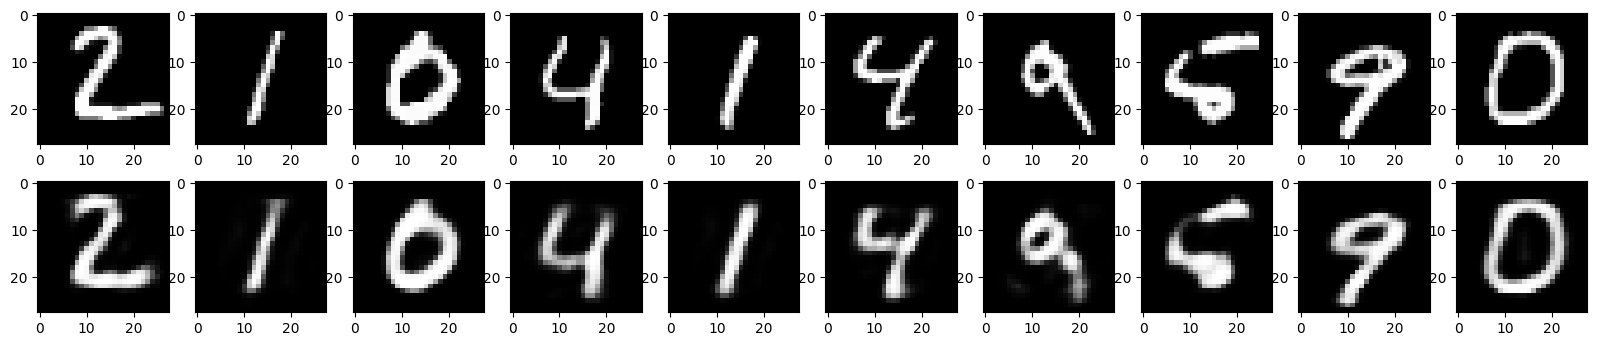

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))        # original
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # reconstructed
    plt.gray()

plt.show()

## Deep autoencoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

encoder = keras.Model(input_img, encoded)
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2850 - val_loss: 0.1418
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1376 - val_loss: 0.1218
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1203 - val_loss: 0.1114
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1113 - val_loss: 0.1056
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1059 - val_loss: 0.1018
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1025 - val_loss: 0.0999
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1004 - val_loss: 0.0977
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0985 - val_loss: 0.0960
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0965 - val_loss: 0.0946
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0949 - val_loss: 0.0930


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


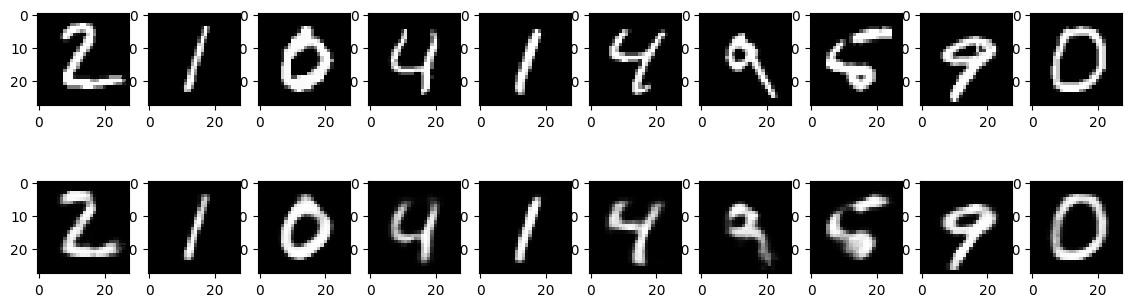

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(14, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()

plt.show()

- we can see that reconstruted data is more clear than the previous one.

# Convolutional autoencoder
- The encoder will consist in a stack of Conv2D and MaxPooling2D layers (max pooling being used for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(input_img)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D(2, 2)(x)
encoder = keras.Model(input_img, encoded)
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1849

In [ ]:
# at this point the representation of 'encoded' is (3, 3, 64)

x = layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu',
                           padding='valid')(encoded)
x = layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu',
                           padding='same')(x)
x = layers.Conv2DTranspose(1, kernel_size=3, strides=2, activation='sigmoid',
                           padding='same')(x)
decoded = layers.Reshape([28,28])(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1849

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
encoded.shape, decoded.shape

(TensorShape([None, 3, 3, 64]), TensorShape([None, 28, 28]))

In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 15s 14ms/step - loss: 0.1938 - val_loss: 0.1010
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0937 - val_loss: 0.0877
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0860 - val_loss: 0.0830
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0826 - val_loss: 0.0806
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0804 - val_loss: 0.0789


In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

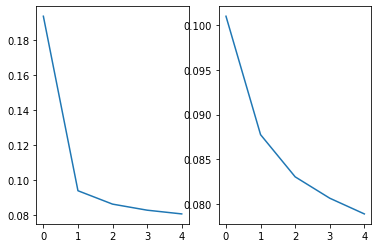

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'])

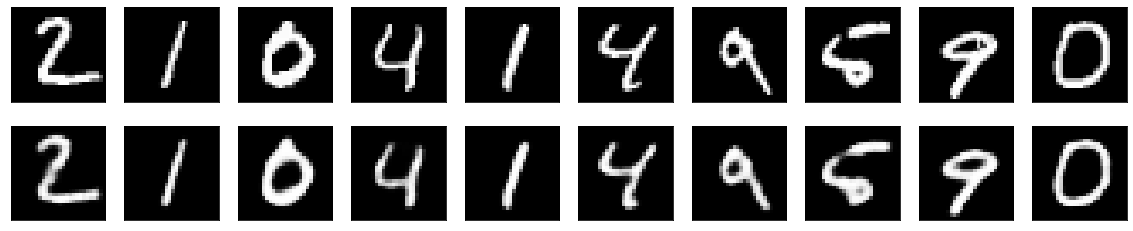

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- It should look better...

(10000, 3, 3, 64)


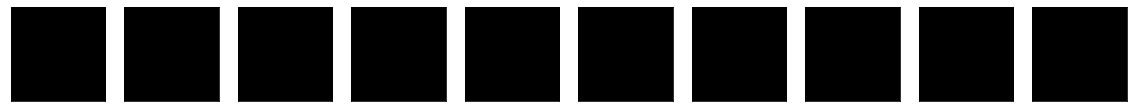

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i][:,:,0])  # first kernel
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to Image denoising
- It's simple: we will train the autoencoder to map noisy digits images to clean digits images.
- Here's how we will generate synthetic noisy digits: we just apply a gaussian noise matrix and clip the images between 0 and 1.

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

- Here's what the noisy digits look like:

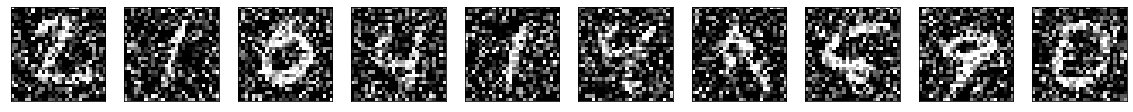

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Compared to the previous convolutional autoencoder, in order to improve the quality of the reconstructed, we'll use a slightly different model with more filters per layer:

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1335 - val_loss: 0.1195
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1180 - val_loss: 0.1153
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1150 - val_loss: 0.1130
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1130 - val_loss: 0.1111
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1113 - val_loss: 0.1094
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1100 - val_loss: 0.1085
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1089 - val_loss: 0.1074
Epoch 8/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1080 - val_loss: 0.1065
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1071 - val_loss: 0.1056
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1063 - val_lo

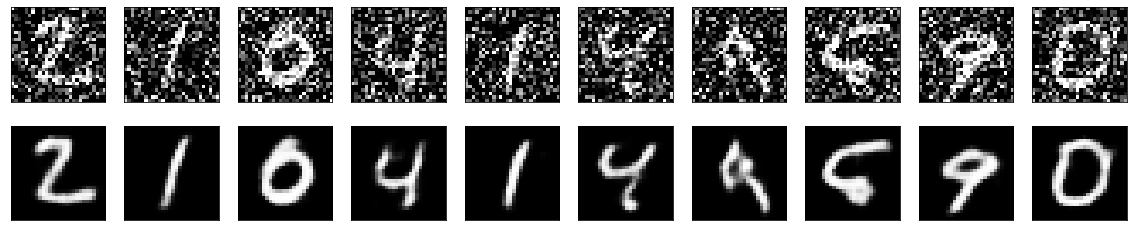

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- It seems to work pretty well. If you scale this process to a bigger convnet, you can start building document denoising or audio denoising models. Kaggle has an interesting dataset to get you started.

# Dimension Reduction using Autoencoders

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # (60000,28,28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

encoder = keras.Model(input_img, encoded)
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.0706 - val_loss: 0.0621
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0598 - val_loss: 0.0580
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0542 - val_loss: 0.0493
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0477 - val_loss: 0.0463
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0455 - val_loss: 0.0448
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0444 - val_loss: 0.0438
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0434 - val_loss: 0.0433
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0427 - val_loss: 0.0425
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0422 - val_loss: 0.0423
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0417 - val_loss: 0.0418

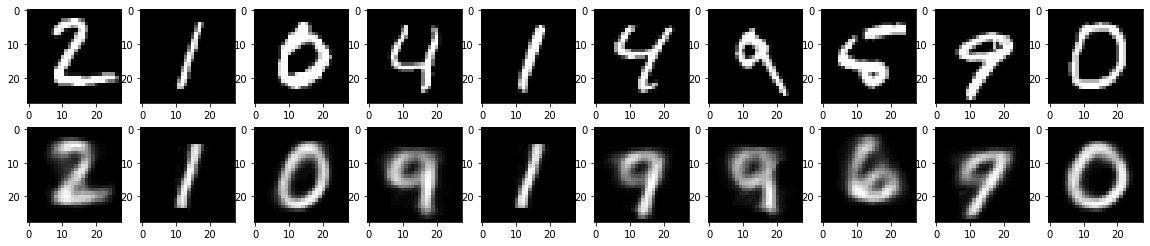

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))        # original
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # reconstructed
    plt.gray()

plt.show()

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)
print(encoded_imgs.shape)

(60000, 2)


In [ ]:
y_train[:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

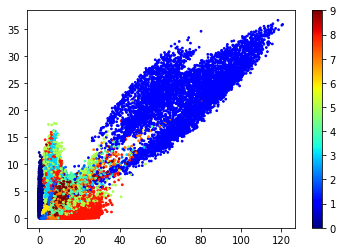

In [ ]:
import matplotlib

plt.scatter(encoded_imgs[:,0], encoded_imgs[:,1], c=y_train, cmap='jet', s=3)
plt.colorbar()

# Using PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # (60000,28,28)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

In [ ]:
pca = PCA(32)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
approx = pca.inverse_transform(x_test_pca)

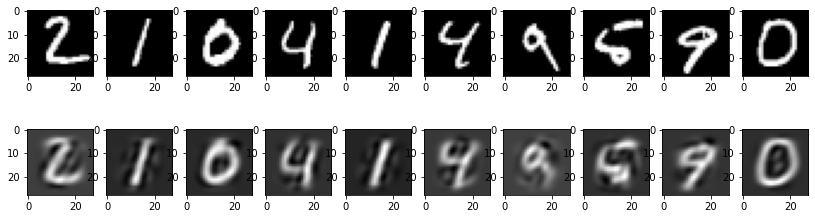

In [ ]:
n = 10
plt.figure(figsize=(14, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))        # original
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(approx[i].reshape(28, 28))  # reconstructed
    plt.gray()

plt.show()

- it is clearly visible that result from Autoencoder is way better.

In [ ]:
# use 100 principal components
pca = PCA(100)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
approx = pca.inverse_transform(x_test_pca)

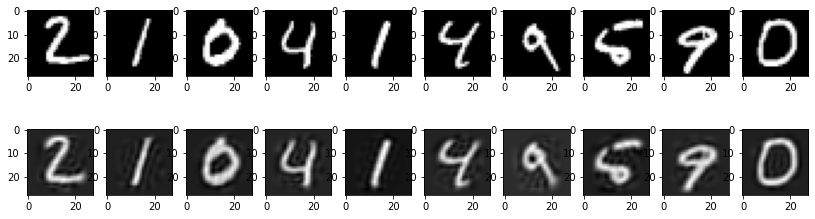

In [ ]:
n = 10
plt.figure(figsize=(14, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))        # original
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(approx[i].reshape(28, 28))  # reconstructed
    plt.gray()

plt.show()

- Difference between PCA and Autoencoder?
  - PCA is an linear transformation where given set of data approximated by straight line.
  - While Autoencoder can learn non linearity structure which is present in data.
  - If we don’t impose any non linearity in network then Autoencoder and PCA are almost similar.

## try to see features in 2d

In [ ]:
pca = PCA(2)
x_train_pca = pca.fit_transform(x_train)
approx = pca.inverse_transform(x_train_pca)

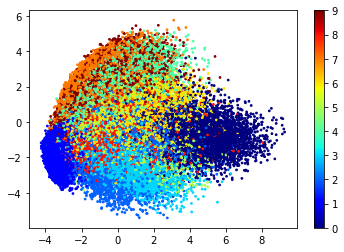

In [ ]:
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, cmap='jet', s=3)
plt.colorbar()

# Lab in the Text

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as kr
%matplotlib inline

# MNIST Dataset parameters.
num_features = 784  # data features (img shape: 28*28).
# Training parameters.
batch_size = 128
epochs = 50

# Network Parameters
hidden_1 = 128 # 1st layer num features.
hidden_2 = 64 # 2nd layer num features (the latent dim).

from tensorflow.keras.datasets import mnist, fashion_mnist

def load_data(choice='mnist', labels=False):
    if choice not in ['mnist', 'fashion_mnist']:
        raise ('Choices are mnist and fashion_mnist')

    if choice is 'mnist':
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
    else:
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    X_train, X_test = X_train / 255., X_test / 255.
    X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])
    X_train = X_train.astype(np.float32, copy=False)
    X_test = X_test.astype(np.float32, copy=False)

    if labels:
        return (X_train, y_train), (X_test, y_test)

    return X_train, X_test


def plot_predictions(y_true, y_pred):
    f, ax = plt.subplots(2, 10, figsize=(15, 4))
    for i in range(10):
        ax[0][i].imshow(np.reshape(y_true[i], (28, 28)), aspect='auto')
        ax[1][i].imshow(np.reshape(y_pred[i], (28, 28)), aspect='auto')
    plt.tight_layout()

def plot_digits(X, y, encoder, batch_size=128):
    """Plots labels and MNIST digits as function of 2D latent vector

    Parameters:
    ----------
    encoder: Model
        A Keras Model instance
    X: np.ndarray
        Test data
    y: np.ndarray
        Test data labels
    batch_size: int
        Prediction batch size
    """

    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(X, batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y)
    plt.colorbar()
    plt.xlabel("z[0] Latent Dimension")
    plt.ylabel("z[1] Latent Dimension")
    plt.show()


def generate_manifold(decoder):
    """Generates a manifold of MNIST digits from a random noisy data.

    Parameters:
    ----------
    decoder: Model
        A Keras Model instance
    """

    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))

    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)

    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0] Latent Dimension")
    plt.ylabel("z[1] Latent Dimension")
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-1-e3a7bdcc92c2>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if choice is 'mnist':


In [ ]:
# encoder
inputs = kr.Input(shape=(num_features, ))
encoder = kr.layers.Dense(hidden_1, activation='sigmoid')(inputs)
encoder = kr.layers.Dense(hidden_2, activation='sigmoid')(encoder)
encoder_model = kr.Model(inputs, encoder, name='encoder')
encoder_model.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108736 (424.75 KB)
Trainable params: 108736 (424.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# decoder
latent_dim = kr.Input(shape=(hidden_2, ))
decoder = kr.layers.Dense(hidden_1, activation='sigmoid')(latent_dim)
decoder = kr.layers.Dense(num_features, activation='sigmoid')(decoder)
decoder_model = kr.Model(latent_dim, decoder, name='decoder')
decoder_model.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 109456 (427.56 KB)
Trainable params: 109456 (427.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Autoencoder model

outputs = decoder_model(encoder_model(inputs))
mnist_model = kr.Model(inputs, outputs )
mnist_model.compile(optimizer='adam', loss='mse')
mnist_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 encoder (Functional)        (None, 64)                108736    
                                                                 
 decoder (Functional)        (None, 784)               109456    
                                                                 
Total params: 218192 (852.31 KB)
Trainable params: 218192 (852.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train, X_test = load_data('mnist')
mnist_model.fit(x=X_train, y=X_train, batch_size=batch_size, shuffle=False, epochs=epochs)

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/50
469/469 [==============================] - 7s 4ms/step - loss: 0.0705
Epoch 2/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0584
Epoch 3/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0472
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0396
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0361
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0318
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0289
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0265
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0245
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0224
Epoch 11/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0208
Epoch 12/50
469/469 [=====================

1/1 [==============================] - 0s 86ms/step


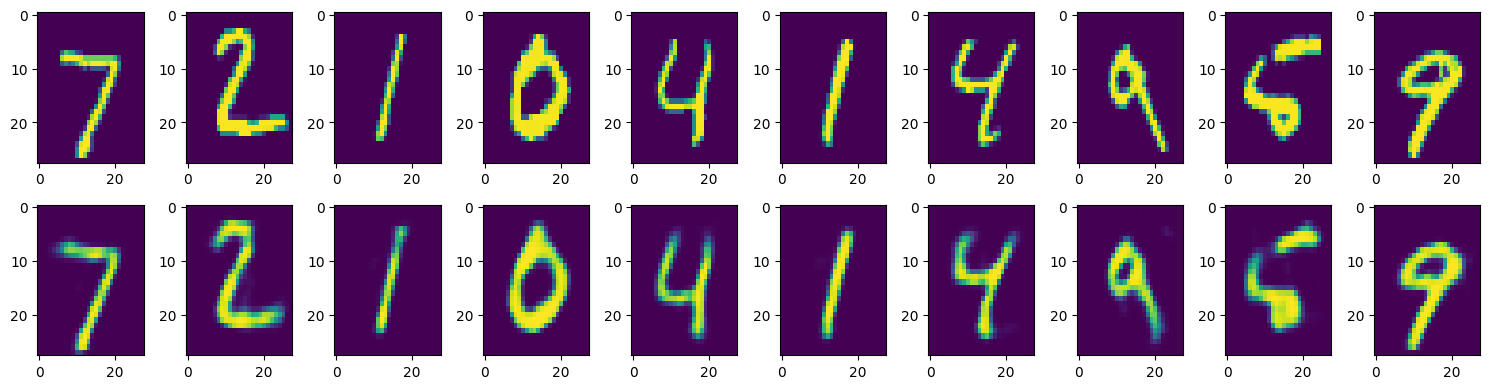

In [ ]:
# plot results
y_true = X_test[:10]
y_pred = mnist_model.predict(y_true)
plot_predictions(y_true, y_pred)

In [ ]:
# fashion_mnist
# Encoder
inputs = kr.Input(shape=(num_features, ))
encoder = kr.layers.Dense(hidden_1,
                        activation='sigmoid')(inputs)
encoder = kr.layers.Dense(hidden_2, activation='sigmoid')(encoder)
encoder_model = kr.Model(inputs, encoder, name='encoder')
encoder_model.summary()

# Decoder
latent_dim = kr.Input(shape=(hidden_2, ))
decoder = kr.layers.Dense(hidden_1, activation='sigmoid')(latent_dim)
decoder = kr.layers.Dense(num_features, activation='sigmoid')(decoder)
decoder_model = kr.Model(latent_dim, decoder, name='decoder')
decoder_model.summary()

# AE
outputs = decoder_model(encoder_model(inputs))
fmnist_model = kr.Model(inputs, outputs )
fmnist_model.compile(optimizer='adam', loss='mse')
fmnist_model.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108736 (424.75 KB)
Trainable params: 108736 (424.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64)]              0         
                                                                 
 d

In [ ]:
X_train, X_test = load_data('fashion_mnist')
fmnist_model.fit(x=X_train, y=X_train, batch_size=batch_size,                                        shuffle=False, epochs=epochs)

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/50
469/469 [==============================] - 4s 5ms/step - loss: 0.0617
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0370
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0287
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0250
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0231
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0217
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0206
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0196
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0187
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0180
Epoch 11/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0174
Epoch 12/50
469/469 [=======================

1/1 [==============================] - 0s 56ms/step


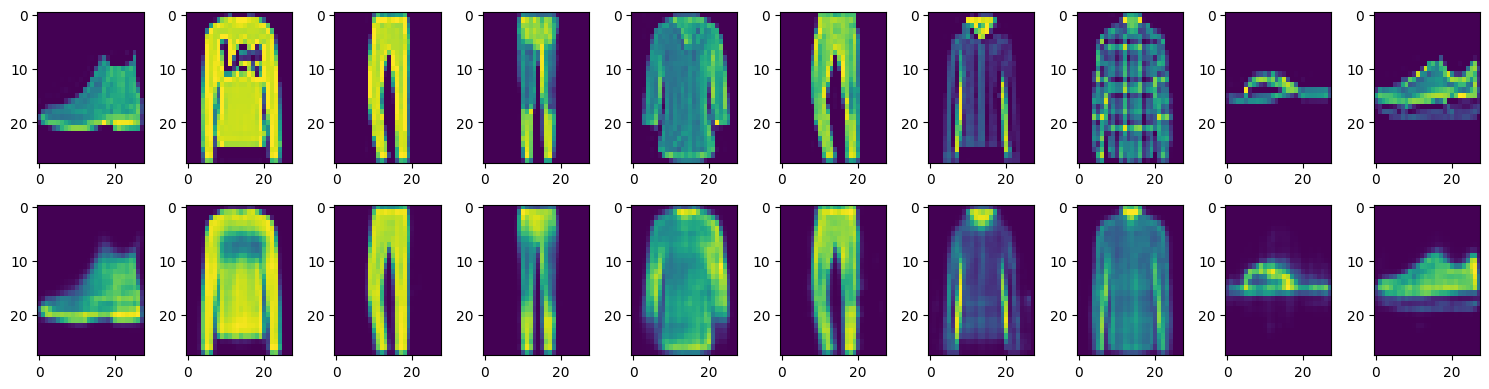

In [ ]:
y_true = X_test[:10]
y_pred = fmnist_model.predict(y_true)
plot_predictions(y_true, y_pred)